In [1]:
import numpy as np
import IPython
import matplotlib.pyplot as plt
from scipy import signal

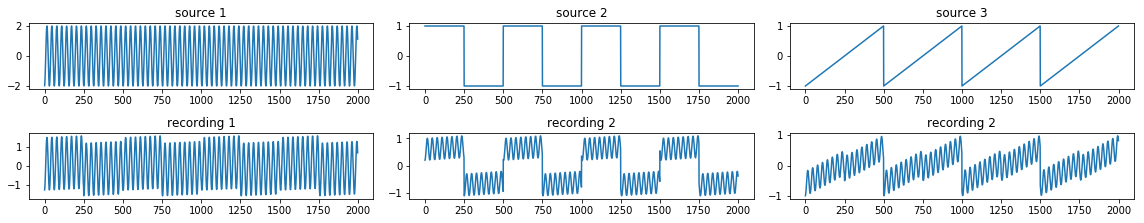

(2000, 3)

In [2]:
def sine(A, omega, phi, x):
    return A * np.sin(omega * x + phi)

x_num = 2000
x1 = sine(2, 0.2, 30, np.array(range(x_num)))
x2 = signal.square(2 * np.pi * 0.002 * np.array(range(x_num)))
x3 = signal.sawtooth(2 * np.pi * 0.002 * np.array(range(x_num)))


X1 = 0.7 * x1 + 0.2 * x2 + 0.1 * x3
X2 = 0.2 * x1 + 0.7 * x2 + 0.1 * x3
X3 = 0.2 * x1 + 0.1 * x2 + 0.7 * x3

fig = plt.figure(figsize=plt.figaspect(0.2))
ax = fig.add_subplot(231)
ax.plot(range(x_num), x1)
plt.title("source 1")
ax = fig.add_subplot(232)
ax.plot(range(x_num), x2)
plt.title("source 2")
ax = fig.add_subplot(233)
ax.plot(range(x_num), x3)
plt.title("source 3")
plt.tight_layout()

ax = fig.add_subplot(234)
ax.plot(range(x_num), X1)
plt.title("recording 1")
ax = fig.add_subplot(235)
ax.plot(range(x_num), X2)
plt.title("recording 2")
ax = fig.add_subplot(236)
ax.plot(range(x_num), X3)
plt.title("recording 2")
plt.tight_layout()
plt.show()

X_original = np.vstack((X1, X2, X3)).T
X_original.shape

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return np.exp(-z) / (1 + np.exp(-z))**2

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - tanh(z) * tanh(z)

In [5]:
m,n = X_original.shape
X = X_original - X_original.mean(axis=0, keepdims=True)
D, E = np.linalg.eig(np.dot(X.T, X) / m)
D = np.diag(D)
X = np.dot(np.dot(np.dot(E, np.sqrt(np.linalg.inv(D))), E.T), X.T).astype("float").T
np.dot(X.T, X)

array([[ 2.00000000e+03,  4.70734562e-13,  2.31548114e-12],
       [ 4.70734562e-13,  2.00000000e+03, -2.26663133e-12],
       [ 2.31548114e-12, -2.26663133e-12,  2.00000000e+03]])

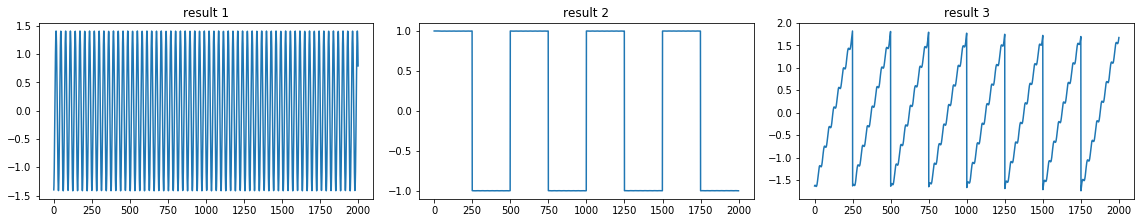

In [6]:
W = np.random.rand(n, n)
max_iter = 1000

for i in range(n):
    w = W[:, i].copy()
    
    for k in range(max_iter):
        w_prev = w
        w = np.dot(X.T, sigmoid(np.dot(X, w))) / m - np.sum(sigmoid_derivative(np.dot(X, w)) / m) * w
        
        
        if i > 0:
            for j in range(i):
                w -= np.dot(w, W[:, j]) * W[:, j]
                
        w = w / (np.sqrt(np.dot(w.T, w)))
                
        if np.abs(np.abs((w_prev * w).sum()) - 1) <= 1e-5:
            break
    
    W[:, i] = w

S = np.dot(X, W)

fig = plt.figure(figsize=plt.figaspect(0.2))
ax = fig.add_subplot(131)
ax.plot(range(x_num), S[:, 0])
plt.title("result 1")
ax = fig.add_subplot(132)
ax.plot(range(x_num), S[:, 1])
plt.title("result 2")
ax = fig.add_subplot(133)
ax.plot(range(x_num), S[:, 2])
plt.title("result 3")
plt.tight_layout()
plt.show()

In [7]:
W

array([[ 0.95934741, -0.0102346 , -0.28204219],
       [ 0.10998123,  0.93389762,  0.3402049 ],
       [ 0.25991667, -0.35739404,  0.89705787]])